# GOES-R DataJam: Setup and Data Access

In this tutorial, we will go over how to start your workflow in JupyterHub, including creating a notebook, installing Python libraries, accessing GOES-R data from AWS, and plotting that data.

## Environment Setup

### GitHub

If you haven't already, set up a [GitHub](https://github.com/) account. This is a very useful tool that allows you to keep track of changes in your documents and collaborate with others. 


### Creating a Jupyter Notebook

In the DataJam JupyterHub environment, select "File -> New -> Notebook" (or the blue plus sign) to create a new Jupyter notebook. Or, upload an existing notebook from your computer by selecting the icon that looks like an up-arrow. To ensure you are using the "datajam" kernel for this event, click on the top right corner of your notebook (should say "Kernel" or "Python" or "datajam" and, when prompted, select the "datajam" kernel. If the kernel is correct, your notebook should now say "datajam" on the top right.

### Install Packages

The DataJam kernel should have all the packages you need to complete this notebook. However, if you need to run this on your local machine, you can install the required packages using pip in a terminal, or with a "magic" command in a notebook cell ("!pip install _package_").

In [ ]:
# install packages using pip
#!pip install ...

In [1]:
# import packages
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import boto3
import fsspec
from botocore import UNSIGNED
from botocore.config import Config

## Data Access

For this notebook we will be accessing ABI CMI files from the GOES-16 satellite, stored on an AWS server. If you want to browse this AWS bucket yourself, you can find the files at: https://noaa-goes16.s3.amazonaws.com/index.html#ABI-L2-CMIPC/ . In this notebook, we will be using the boto3 library to directly fetch the files we want from the S3 bucket by passing it the bucket name and the prefix.

Note that the bucket is organized by year, day of year, and hour. If you know a particular day that you are interested in, you can use add this information in the format "ABI-L2-CMIPC/YEAR/DAY/HOUR/" to the page iterator variable.

In [2]:
# set up access to S3 bucket
s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
paginator = s3.get_paginator("list_objects_v2")
page_iterator = paginator.paginate(Bucket="noaa-goes16", Prefix="ABI-L2-CMIPC/2023/241/18/") 

S3_HEADER = "s3://noaa-goes16/"
files_mapper = [S3_HEADER + f["Key"] for page in page_iterator for f in page["Contents"]]

In [3]:
files_mapper[1]

's3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411806172_e20232411808545_c20232411809014.nc'

In [4]:
# open data file
# libraries needed: netcdf4, pydap
url_blue = files_mapper[1] +"#mode=bytes"
ds_blue = xr.open_dataset(url_blue)
ds_blue

<xarray.Dataset>
Dimensions:                                           (y: 3000, x: 5000,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       band: 1)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float64 0.1282 ... ...
  * x                                                 (x) float64 -0.1013 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_wavelength                                   (band) float32 ...
    band_id                                           (band) int8 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/35)
    CMI                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    focal_plane_temperature_threshold_exceeded_count  float64 ...
    maximum_focal_plane_temperature                   float32 ...
    focal_plane_temperature_threshold_increasing      float32 ...
    focal_plane_temperature_threshold_decreasing      float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-08-29T18:06:17.2Z
    time_coverage_end:         2023-08-29T18:08:54.5Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        c24a461b-5a55-4645-bce2-de3d328c7692

### What is ABI CMI file?

Advanced Baseline Imager (ABI) is the instrument on the GOES-R satellites that takes images of Earth. These images allow scientists to observe Earth's weather, oceans, and environment. The images include 16 spectral bands - 2 visible, 4 near-infrared, and 10 infrared. 

Cloud and Moisture Imagery (CMI) is an ABI product that uses all of the spectral bands to generate products for monitoring and predicting weather hazards.

### ABI Imagery Bands

### Plotting an Image

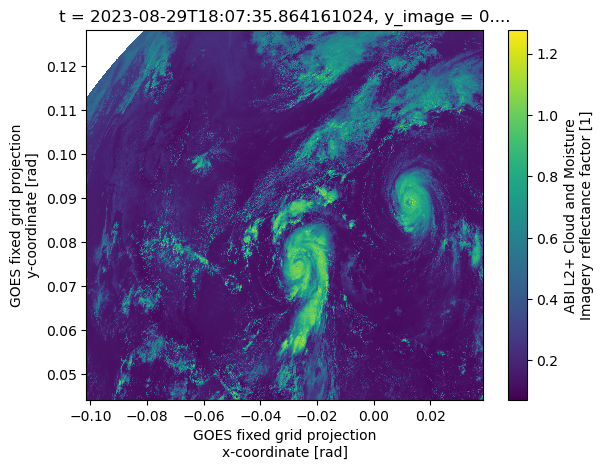

In [5]:
# plot a simple image with one band
ds_blue["CMI"].plot()

In [6]:
# inspect other channels

# red
red_prefix = "ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C02"

page_iterator = paginator.paginate(Bucket = 'noaa-goes16', Prefix = red_prefix)

files_mapper = ["s3://noaa-goes16/" + file['Key'] for page in page_iterator for file in page['Contents']]


url_red = files_mapper[1] + "#mode=bytes"
ds_red = xr.open_dataset(url_red) 


In [7]:

# vegetation ("veggie") 
veggie_prefix = "ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C03"

page_iterator = paginator.paginate(Bucket = 'noaa-goes16', Prefix = veggie_prefix)

files_mapper = ["s3://noaa-goes16/" + file['Key'] for page in page_iterator for file in page['Contents']]


url_veggie = files_mapper[1] + "#mode=bytes"
ds_veggie = xr.open_dataset(url_veggie) 


In [8]:
display(ds_blue["CMI"].values.shape)
display(ds_red["CMI"].values.shape)
display(ds_veggie["CMI"].values.shape)

(3000, 5000)

(6000, 10000)

(3000, 5000)

In [8]:
# resample red 
red_vals = ds_red["CMI"].values
shape = ds_blue["CMI"].values.shape

sh = shape[0], red_vals.shape[0]//shape[0], shape[1], red_vals.shape[1]//shape[1]
ds_red_reshape = red_vals.reshape(sh).mean(-1).mean(1)

In [9]:
ds_red_reshape.shape

(3000, 5000)

In [10]:
red_1km = ds_red_reshape
blue_1km = ds_blue["CMI"].values
veggie_1km = ds_veggie["CMI"].values

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


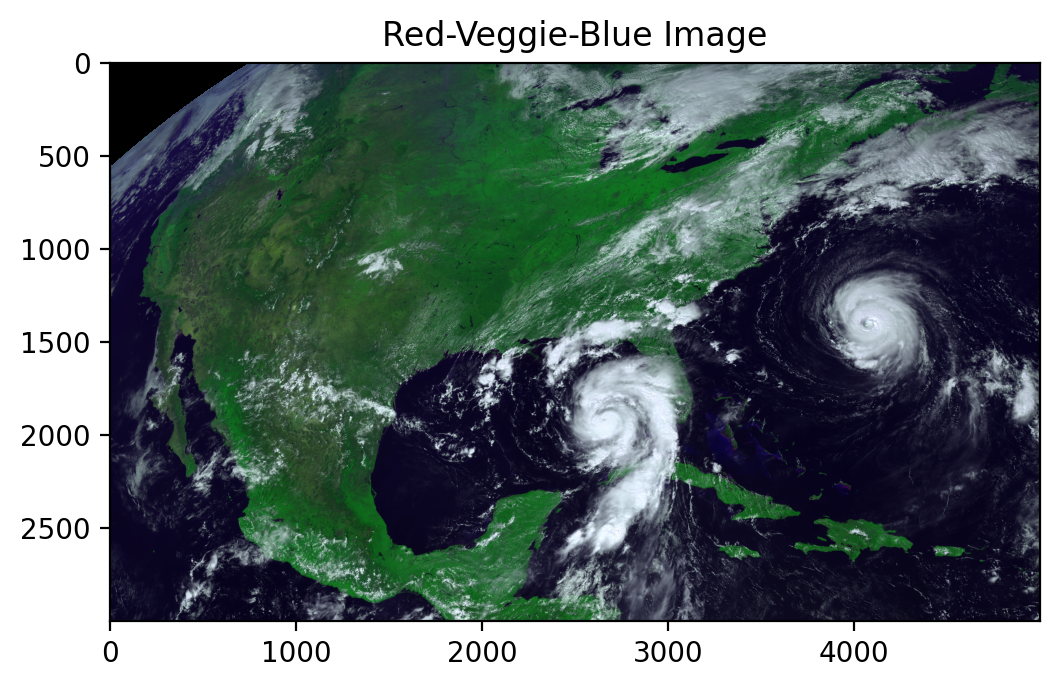

In [21]:
# plot with all colors
rgb = np.stack([red_1km, veggie_1km, blue_1km], axis = 2)

fig = plt.figure(figsize=(6,6), dpi = 200)
img = plt.imshow(rgb)
plt.title("Red-Veggie-Blue Image")
plt.show()

### Plotting an Animation

In [11]:
# get more time bands

page_iterator = paginator.paginate(Bucket="noaa-goes16", Prefix="ABI-L2-CMIPC/2023/241/18/") 

S3_HEADER = "s3://noaa-goes16/"
files_mapper = [S3_HEADER + f["Key"] for page in page_iterator for f in page["Contents"]]

files_mapper

['s3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411801172_e20232411803545_c20232411804014.nc',
 's3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411806172_e20232411808545_c20232411809014.nc',
 's3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411811172_e20232411813545_c20232411814011.nc',
 's3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411816172_e20232411818545_c20232411819013.nc',
 's3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411821172_e20232411823545_c20232411824007.nc',
 's3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411826172_e20232411828546_c20232411829013.nc',
 's3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411831172_e20232411833545_c20232411834008.nc',
 's3://noaa-goes16/ABI-L2-CMIPC/2023/241/18/OR_ABI-L2-CMIPC-M6C01_G16_s20232411836172_e20232411838545_c20232411839014.nc',
 's3://noaa-goes

In [23]:
urls = [(i +"#mode=bytes") for i in files_mapper[0:12]]
#urls.extend([i + "#mode=bytes" for i in files_mapper_hour19[0:12]])

data_list = []
for url in urls:
    data_list.append(xr.open_dataset(url))

data_list
    

[<xarray.Dataset>
 Dimensions:                                           (y: 3000, x: 5000,
                                                        number_of_time_bounds: 2,
                                                        number_of_image_bounds: 2,
                                                        band: 1)
 Coordinates:
     t                                                 datetime64[ns] ...
   * y                                                 (y) float64 0.1282 ... ...
   * x                                                 (x) float64 -0.1013 ......
     y_image                                           float32 ...
     x_image                                           float32 ...
     band_wavelength                                   (band) float32 ...
     band_id                                           (band) int8 ...
 Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                 band
 Data variables: (12/35)
    

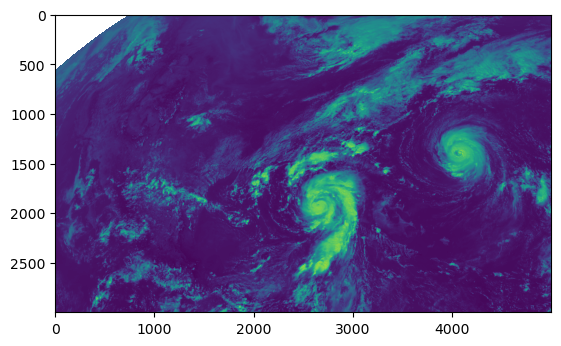

In [24]:
# Animate images from GOES-R data
from matplotlib import animation


frames = []

for i in data_list:
    vals = i["CMI"].values
    frames.append(vals)


def generate_frame(f):
    return [ax.imshow(f, animated=True)] # TRY OUT IM.SETDATA
    
fig, ax = plt.subplots()

ani = animation.FuncAnimation(fig, generate_frame, frames, interval = 500, repeat=True, blit=True)
plt.show()

from IPython.display import HTML

HTML(ani.to_jshtml())

